In [279]:
#Import the libraries that contains the necessary functions for the problem
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Seems that I'm having trouble loading the spreadsheet file so an additional fix will be applied ###

In [281]:
#Change the directory path
new_path = r"C:\Users\PC\Documents\Python Codes\Modules\Incentives\Top Spotify Music Incentives\spotify-2023.csv"

In [282]:
#load the spreadsheet file
data = pd.read_csv(new_path, encoding='cp1252')

# Overview of Dataset #
- Determine the number of rows and columns that the dataset contain

In [284]:
#Use .shape to get number of row and column respectively and assign their values to a variable
row_count, column_count = data.shape

#print
print("The dataset has " + str(row_count) + " rows and " + str(column_count) + " columns.")

The dataset has 953 rows and 24 columns.


- What are the data types of each column?

In [286]:
#Use .dtype to print the data type of each column
print(data.dtypes)

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


- Are there any missing values?

In [288]:
print(data.isnull().values.any()) #This line of code will print True if it finds at least one entry with missing value

True


In [289]:
print("Columns with missing values:")
# Check for missing values in each column
print(data.isnull().sum()) #The values that will be printed indicates the number of entries with missing values of that specific column

Columns with missing values:
track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


#### From this point on, I'll be using the cleaned data ####

In [291]:
#load the cleaned spreadsheet file
newer_path = r"C:\Users\PC\Documents\Python Codes\Modules\Incentives\Top Spotify Music Incentives\Spotify_2023_(Cleaned).csv"

cleaned_data = pd.read_csv(newer_path, encoding='cp1252')

In [292]:
# Use .shape to get number of rows and columns respectively and assign their values to a variable
cleaned_row_count, cleaned_column_count = cleaned_data.shape

In [293]:
# Use .dtype to print the data type of each column
print(cleaned_data.dtypes)

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


In [294]:
print(cleaned_data.isnull().values.any())  # Will print True if it finds at least one entry with a missing value

False


In [295]:
print("Columns with missing values:")
# Check for missing values in each column
print(cleaned_data.isnull().sum())  # The values that will be printed indicates the number of entries with missing values in that specific column
print("The dataset has " + str(cleaned_row_count) + " rows and " + str(cleaned_column_count) + " columns.") #Display the number of rows and columns for the new and cleaned data set

Columns with missing values:
track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64
The dataset has 949 rows and 24 columns.


**The cleaned data set lost 4 rows as a result of removing the ~~duplicate songs~~**

# Basic Descriptive Statistics #
**Get the mean, median, and standard deviation of the stream column**

In [298]:
# Pick out the stream column
x = 'streams'

In [299]:
# Get mean, median, and standard deviation
mean_streams = cleaned_data[x].mean()
median_streams = cleaned_data[x].median()
standard_streams = cleaned_data[x].std()

In [300]:
print("Mean of " + x + ": " + str(mean_streams))

Mean of streams: 513476285.8651212


In [301]:
print("Median of " + x + ": " + str(median_streams))

Median of streams: 287278853.0


In [302]:
print("Standard Deviation of " + x + ": " + str(standard_streams))

Standard Deviation of streams: 567873302.7109758


**Get the distribution of released_year and artist_count. As well as identify noticeable trends or outliers**

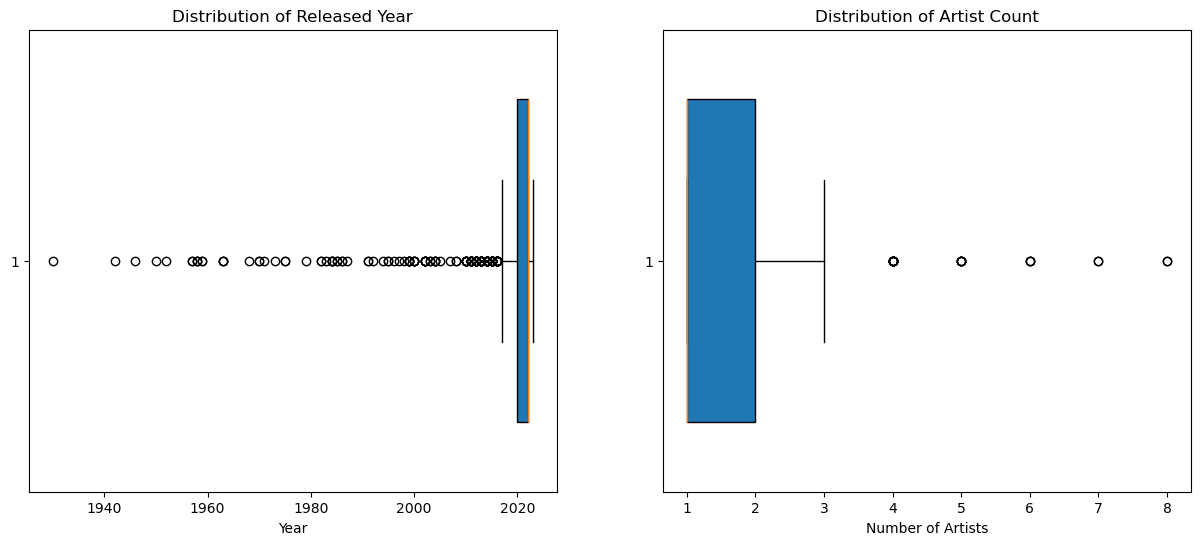

In [304]:
# Create the box plot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot for released_year
axes[0].boxplot(cleaned_data['released_year'], vert=False, widths=0.7, patch_artist=True)
axes[0].set_title('Distribution of Released Year')
axes[0].set_xlabel('Year')

# Boxplot for artist_count
axes[1].boxplot(cleaned_data['artist_count'], vert=False, widths=0.7, patch_artist=True)
axes[1].set_title('Distribution of Artist Count')
axes[1].set_xlabel('Number of Artists')

# Display the plots
plt.show()

**Entries that are outside or the circles that are outside the whiskers of the boxplot are basically the outliers**

In [306]:
#Create a function that would calculate and display the number of outliers
def count_outliers(x):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = cleaned_data[x].quantile(0.25)
    Q3 = cleaned_data[x].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define the lower and upper bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = cleaned_data[(cleaned_data[x] < lower_bound) | (cleaned_data[x] > upper_bound)]
    print("Number of outliers in '{}': {}".format(x, len(outliers)))

# Print
count_outliers('released_year')
count_outliers('artist_count')

Number of outliers in 'released_year': 151
Number of outliers in 'artist_count': 27


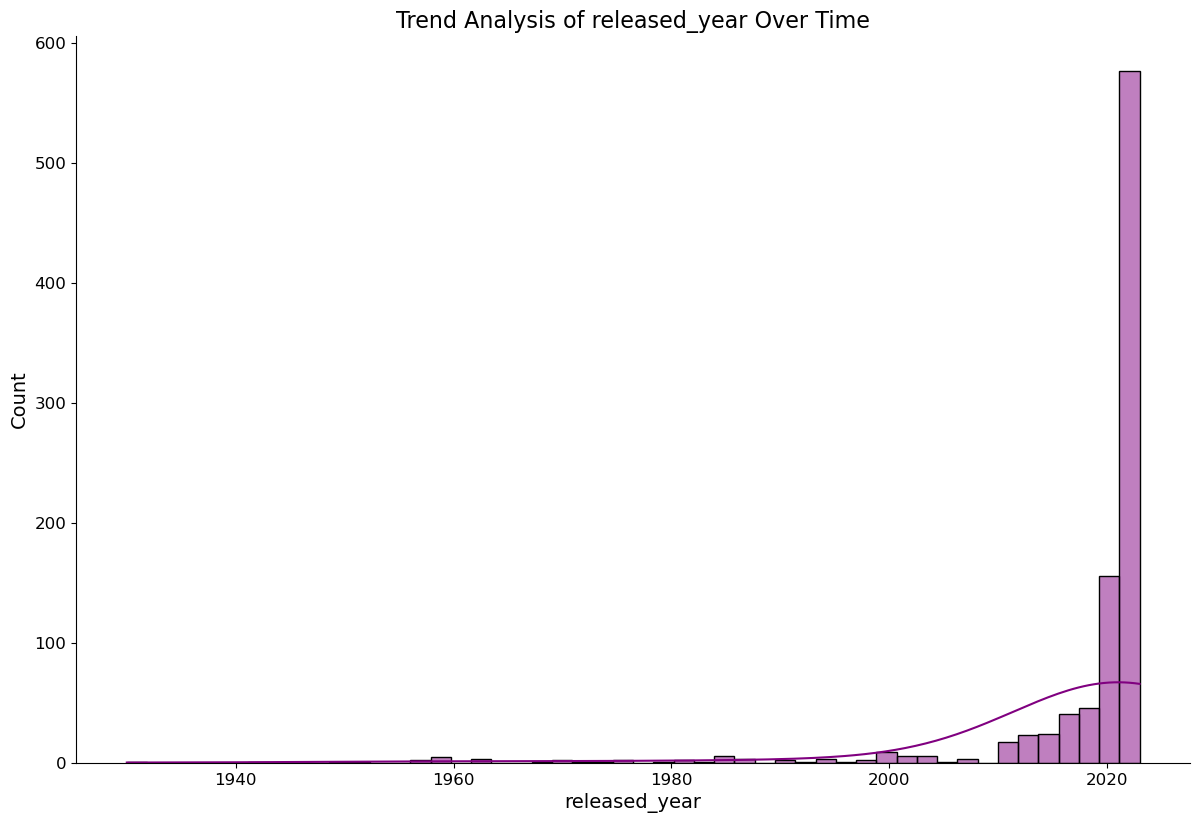

Most common released_year: 2022 with 402 occurrences
Least common released_year: 1930 with 1 occurrences


In [307]:
#Create a function that would display the least and most common released year of songs
def analyze_trends(column):
    # Calculate value counts for each year
    trend_data = data[column].value_counts().sort_index()
    
    # Convert the index and values to a data for easy plotting
    trend_df = trend_data.reset_index()
    trend_df.columns = [column, 'Count']

    # Use Seaborn displot
    sns.displot(
        trend_df, x=column, weights='Count', kde=True, bins=len(trend_df), color='purple',
        height=8, aspect=1.5)  #Adjust size 


    # Title and labels
    plt.title('Trend Analysis of {} Over Time'.format(column), fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Print the numbers of most and least common years
    most_common_year = trend_data.idxmax()
    least_common_year = trend_data.idxmin()
    print("Most common {}: {} with {} occurrences".format(column, most_common_year, trend_data.max()))
    print("Least common {}: {} with {} occurrences".format(column, least_common_year, trend_data.min()))

analyze_trends('released_year')

# Top Performers:
**Display 5 of the most streamed tracks**

In [309]:
# Sort by 'streams' to get the top 5 most streamed tracks
top_streamed_tracks = cleaned_data[['track_name', 'artist(s)_name', 'streams']].sort_values(by='streams', ascending=False).head(5)

# Use for loop to print each of the most streamed tracks
print("Top 5 Most Streamed Tracks:")
for i, row in top_streamed_tracks.iterrows():
    print(row['track_name'], "by", row['artist(s)_name'], "with a stream count of:", row['streams'])

Top 5 Most Streamed Tracks:
Blinding Lights by The Weeknd with a stream count of: 3703895074
Shape of You by Ed Sheeran with a stream count of: 3562543890
Someone You Loved by Lewis Capaldi with a stream count of: 2887241814
Dance Monkey by Tones and I with a stream count of: 2864791672
Sunflower - Spider-Man: Into the Spider-Verse by Post Malone, Swae Lee with a stream count of: 2808096550


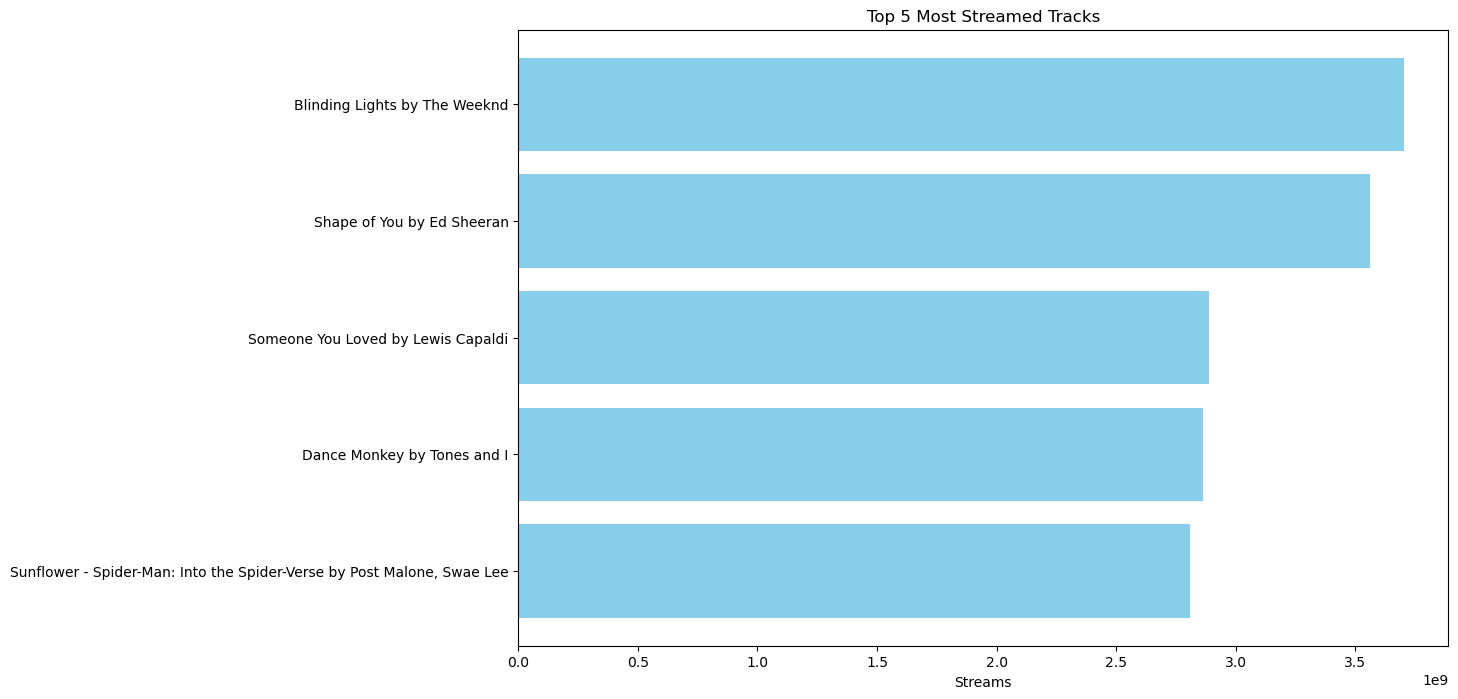

In [310]:
# Create a bar graph for better visualization
plt.figure(figsize=(12, 8))
plt.barh(top_streamed_tracks['track_name'] + " by " + top_streamed_tracks['artist(s)_name'], top_streamed_tracks['streams'], color='skyblue')
plt.xlabel('Streams')
plt.title('Top 5 Most Streamed Tracks')
plt.gca().invert_yaxis()  # To display the highest stream at the top
plt.show()

****The numbers on the x-axis are the number of streams but in billions***

**Identify the top 5 most frequent artists based on the number of tracks in the dataset**

In [313]:
# Count occurrences of each artist and get the top 5
top_artists = cleaned_data['artist(s)_name'].value_counts().head(5)

# Print the top 5
print("Top 5 Most Frequent Artists:")
for artist, count in top_artists.items():
    print(artist + " with a number of tracks of: " + str(count))

Top 5 Most Frequent Artists:
Taylor Swift with a number of tracks of: 34
The Weeknd with a number of tracks of: 21
SZA with a number of tracks of: 19
Bad Bunny with a number of tracks of: 19
Harry Styles with a number of tracks of: 17


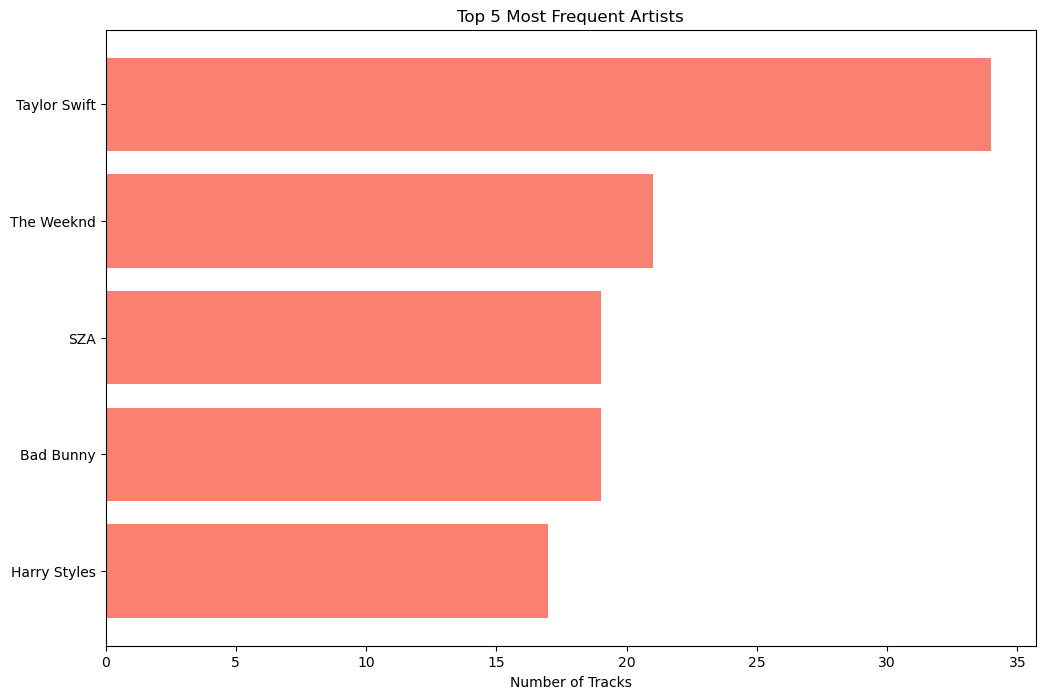

In [314]:
# Generate a bar graph 
plt.figure(figsize=(12, 8))
plt.barh(top_artists.index, top_artists.values, color='salmon')
plt.xlabel('Number of Tracks')
plt.title('Top 5 Most Frequent Artists')
plt.gca().invert_yaxis()  # To display the highest count at the top
plt.show()

# Temporal Trends #
**Get number of tracks released over time and plot the number of tracks released per year.**

In [316]:
# Create a code that would count the number of tracks released per year and per month
yearly_release_counts = cleaned_data['released_year'].value_counts().sort_index()
monthly_release_counts = cleaned_data['released_month'].value_counts().sort_index()

# Print the trend analysis
print("Trend Analysis of Track Releases Over Time:")
for year, count in yearly_release_counts.items():
    print("Year:", year, "|| Number of Tracks Released:", count)

# Determine the month with the highest releases
most_common_month = monthly_release_counts.idxmax()
most_common_month_count = monthly_release_counts.max()

# Display the monthly release pattern
print("\nTrack Releases Per Month:")
for month, count in monthly_release_counts.items():
    print("Month:", month, "|| Number of Tracks Released:", count)

# Print the month with the most releases
print("\nMonth with the most releases:", most_common_month, "with", most_common_month_count, "releases.")

Trend Analysis of Track Releases Over Time:
Year: 1930 || Number of Tracks Released: 1
Year: 1942 || Number of Tracks Released: 1
Year: 1946 || Number of Tracks Released: 1
Year: 1950 || Number of Tracks Released: 1
Year: 1952 || Number of Tracks Released: 1
Year: 1957 || Number of Tracks Released: 2
Year: 1958 || Number of Tracks Released: 3
Year: 1959 || Number of Tracks Released: 2
Year: 1963 || Number of Tracks Released: 3
Year: 1968 || Number of Tracks Released: 1
Year: 1970 || Number of Tracks Released: 2
Year: 1971 || Number of Tracks Released: 1
Year: 1973 || Number of Tracks Released: 1
Year: 1975 || Number of Tracks Released: 2
Year: 1979 || Number of Tracks Released: 1
Year: 1982 || Number of Tracks Released: 2
Year: 1983 || Number of Tracks Released: 1
Year: 1984 || Number of Tracks Released: 4
Year: 1985 || Number of Tracks Released: 2
Year: 1986 || Number of Tracks Released: 2
Year: 1987 || Number of Tracks Released: 1
Year: 1991 || Number of Tracks Released: 2
Year: 1992

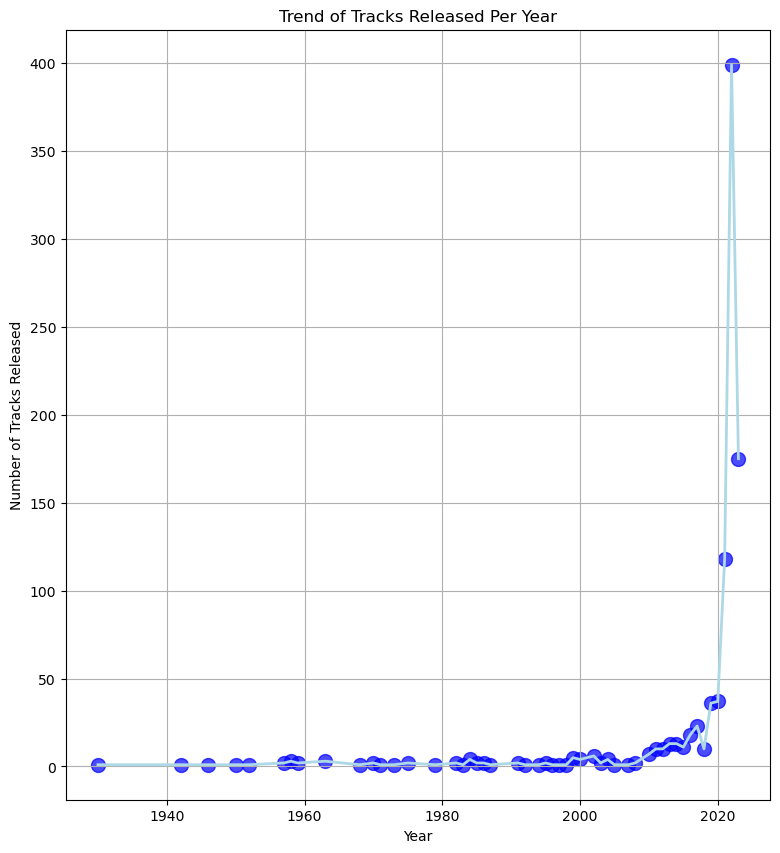

In [317]:
# # Adjusted size for better visibility
plt.figure(figsize=(20, 10))

# Visualization of the yearly trend using a scatter plot
plt.subplot(1, 2, 1)
plt.scatter(yearly_release_counts.index, yearly_release_counts.values, color='b', alpha=0.7, s=100)
plt.plot(yearly_release_counts.index, yearly_release_counts.values, color='lightblue', linewidth=2)
plt.title('Trend of Tracks Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks Released')
plt.grid(True)

**Check for noticeable patterns in the tracks released per month? Which month sees the most releases?**

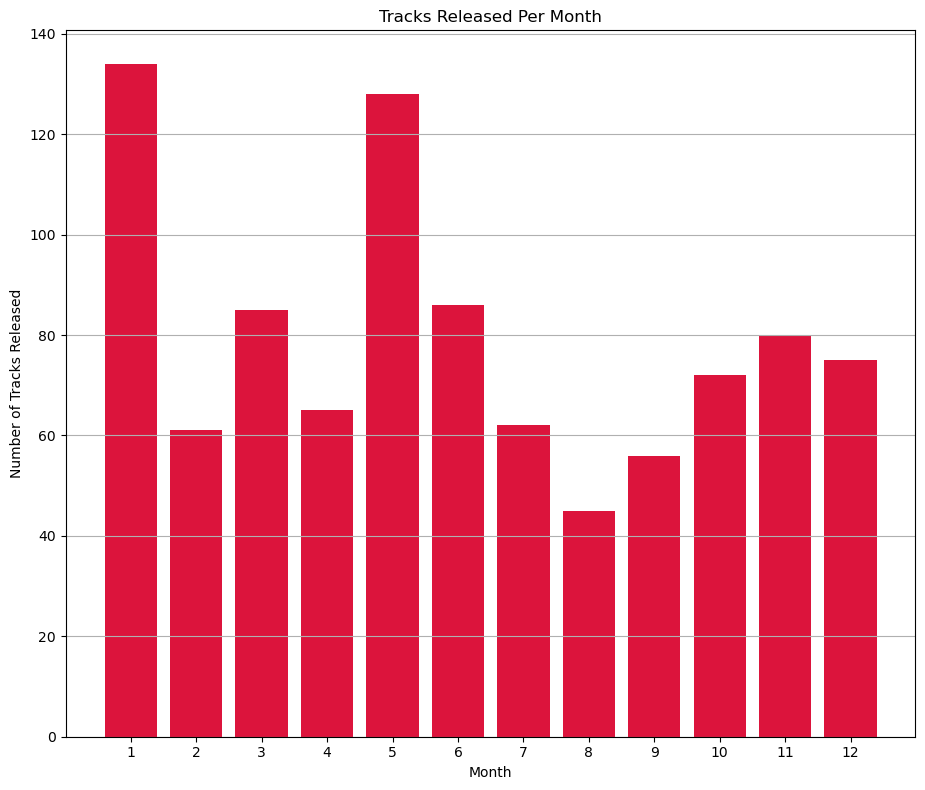

In [319]:
plt.figure(figsize=(18, 8))  # Adjusted size for better visibility

# Create a bar graph for the monthly trend
plt.subplot(1, 2, 2)
plt.bar(monthly_release_counts.index, monthly_release_counts.values, color='crimson')
plt.title('Tracks Released Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tracks Released')
plt.xticks(range(1, 13))  # Months labeled from 1 to 12
plt.grid(axis='y')

# Prevent overlap
plt.tight_layout()

#Display Graph
plt.show()

**Base on the graph, as "Ber Months" occur, songs released over these months gradully increase then spikes during new year**

# Genre and Music Characteristics

**The correlation between streams and musical attributes such as bpm, danceability, and energy. Display which attribute seems to be influencing the streams the most.**

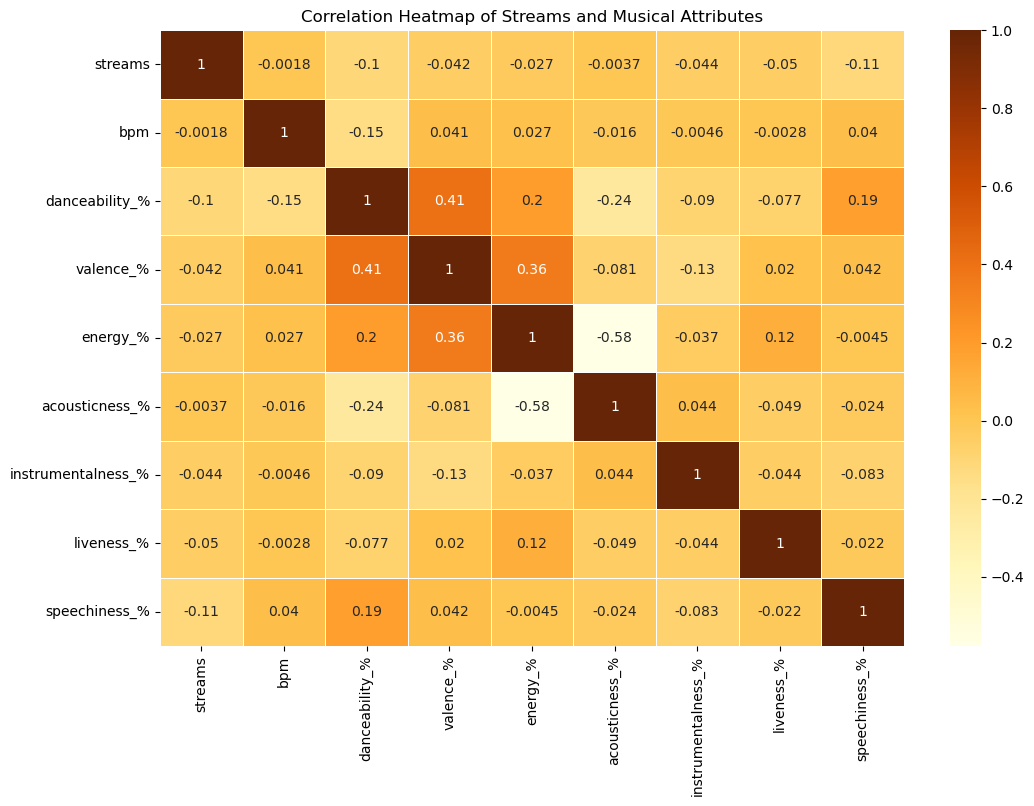

In [323]:
# Pick out the columns of attribute
attributes = ['streams', 'bpm', 'danceability_%', 'valence_%', 
              'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# compute for the correlation matrix
correlation_matrix = cleaned_data[attributes].corr()

# Use and create heatmap for correlation display and print
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr', linewidths=0.5)
plt.title('Correlation Heatmap of Streams and Musical Attributes')
plt.show()

**Based on the results, despite having very weak correlation due to low value output, the attribute that seems to be influencing the streams the most is the speechiness**

**Get the correlation of danceability and energy. As well as the correlation of valence and acousticness.**

In [326]:
#Compute the correlation matrix
correlation_matrix = cleaned_data[attributes].corr()

danceability_energy_corr = correlation_matrix.loc['danceability_%', 'energy_%']

#Print correlation of danceability and energy
print("Correlation between Danceability and Energy: {:.2f}".format(danceability_energy_corr))

valence_acousticness_corr = correlation_matrix.loc['valence_%', 'acousticness_%']

#Print correlation of valence and acousticness
print("Correlation between Valence and Acousticness: {:.2f}".format(valence_acousticness_corr))

Correlation between Danceability and Energy: 0.20
Correlation between Valence and Acousticness: -0.08


# Platform Popularity
**How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists compare? Which platform seems to favor the most popular tracks?**

In [328]:
total_spotify_playlists = cleaned_data['in_spotify_playlists'].sum()
total_spotify_charts = cleaned_data['in_spotify_charts'].sum()
total_apple_playlists = cleaned_data['in_apple_playlists'].sum()

# Print results
print("Platform Popularity Comparison:")
print("Total Tracks in Spotify Playlists: " + str(total_spotify_playlists))
print("Total Tracks in Spotify Charts: " + str(total_spotify_charts))
print("Total Tracks in Apple Playlists: " + str(total_apple_playlists))

Platform Popularity Comparison:
Total Tracks in Spotify Playlists: 4937915
Total Tracks in Spotify Charts: 11445
Total Tracks in Apple Playlists: 64205


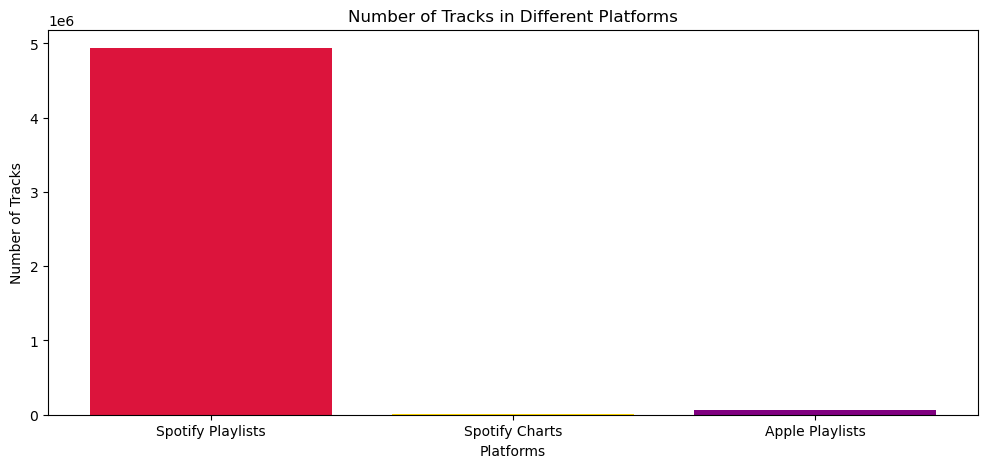

In [329]:
# Initialize variable and insert data
platforms = ['Spotify Playlists', 'Spotify Charts', 'Apple Playlists']
totals = [total_spotify_playlists, total_spotify_charts, total_apple_playlists]

# Plot the bar graph
plt.figure(figsize=(12, 5))
plt.bar(platforms, totals, color=['crimson', 'gold', 'purple'])
plt.title('Number of Tracks in Different Platforms')
plt.ylabel('Number of Tracks')
plt.xlabel('Platforms')
plt.show()

**This bar graph shows how the number of tracks in 'Spotify Playlists' dominates when compared to the other platforms.**

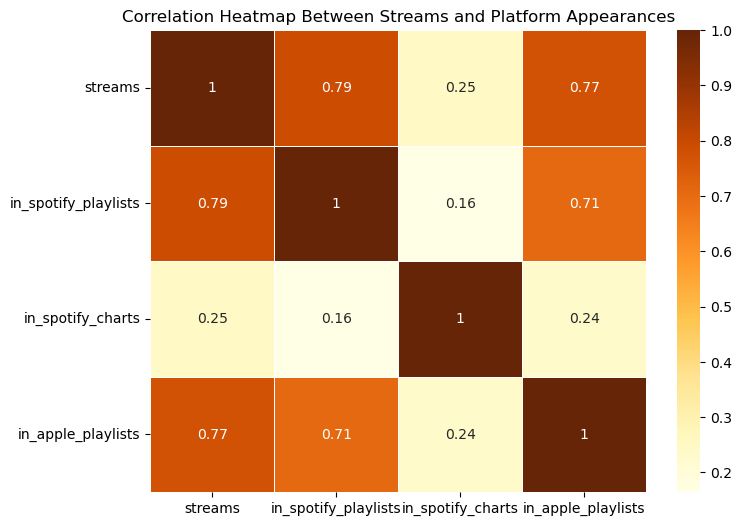

In [331]:
# create correlation heatmap to show the relationship of streams and occurences
platform_columns = ['streams', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']
correlation_matrix = cleaned_data[platform_columns].corr()

# Plot the heatmap for platform correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr', linewidths=0.5)
plt.title("Correlation Heatmap Between Streams and Platform Appearances")
plt.show()

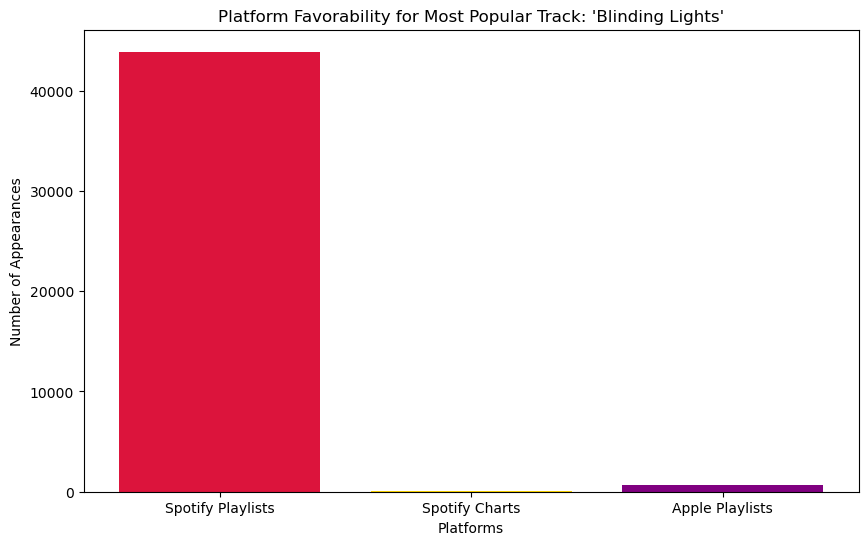

In [346]:
# Identify the track with the highest stream count
most_popular_track = cleaned_data.loc[cleaned_data['streams'].idxmax()]

# Extract the values of the most popular track on each of the platform
platform_favor_counts = [
    most_popular_track['in_spotify_playlists'],
    most_popular_track['in_spotify_charts'],
    most_popular_track['in_apple_playlists']
]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(platforms, platform_favor_counts, color=['crimson', 'gold', 'purple'])
plt.title(f"Platform Favorability for Most Popular Track: '{most_popular_track['track_name']}'")
plt.ylabel('Number of Appearances')
plt.xlabel('Platforms')
plt.show()

**Base on the heatmap, it shows that 'Spotify Playlists' has a strong positive correlation with the stream. Meaning that tracks with higher stream value tends to appear on the said platform. Additionally, 'Blinding Lights', the most popular track, is most present at 'Spotify Playlist'. Once again indicating that the platform favors the most prominent tracks.**

# Advanced Analysis